In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# import sys
# sys.path.append('/content/gdrive/MyDrive/GSOC_code/updated_data/')



Mounted at /content/gdrive


### Problem Description

## Problem description 

Galaxies are embedded in large gas haloes termed the “circumgalactic medium (CGM)”. The history of a galaxy is encapsulated in the history of its gas cycling between the visible body of the galaxy and the CGM. The CGM is a source for a galaxy’s star-forming fuel, and plays a role in regulating the galactic gas supply. Understanding the CGM and its history thus offers insight into galaxy evolution. 

One way to study galaxy CGMs is through the absorption lines they cause in the spectra of bright background objects, such as quasars. As the light passes through a slab of gas constituting the CGM, the gas absorbs part of the light, resulting in an absorption line in the resulting spectrum, as the figure below illustrates. 

(Note that the light intensity is always **non-negative**).

![image](https://user-images.githubusercontent.com/71390120/131004001-9958b083-11c0-4a62-aedf-073a7b629ad1.png)

The characteristics of the absorption lines depend on the properties and type of the gas itself. Thus, it is plausible that there are some underlying/latent gas characteristics, such as density, temperature, elemental abundances and velocity that result in spectra with similar characteristics. These properties are unobservable, which motivates the search for an underlying latent space — a low-dimensional representation of spectra, which would capture these properties.

Your task will be to find a latent space from which the original spectra can be reconstructed with minimal information loss, as described in more detail below.

# Data

You will be given a dataset of simulated spectra, where a given row corresponds to a single spectrum, and each column corresponds to a wavelength. That is, entry $ x_{i,j} $ in the given data is light intensity for spectrum $ i $ at wavelength $ j $ (so the plot above is a plot of one row of the data).

We provide three datasets:
1. Training data: This should be used for model fitting.
2. Validation data: Hyperparameter tuning should be done using this dataset.
3. Test data: Use your FINAL model to calculate reconstructions for this data. DO NOT use this for model fitting. 

You can do anything with the train and validation datasets (for example, if using cross-validation you can pool them). Test data should be only used once, to generate rconstructions using your final model. 

Note that we will use a separate dataset (which you won't have access to) to assess the submitted models.


# Objective

Given a dataset of spectra, your task is to reduce its dimensionality. For example, starting with 2000 spectra with 100 000 features/wavelengths, your task is to represent these spectra with just a few features. For example, you can end up with a dataset of 2000 specta, each with 6 features (instead of the original 100 000 features).

Below we will refer to the features of the reduced spectra as "latent variables". So in the example above, the reduced spectrum has 6 latent variables.

The dimensionality reduction necessarily involves some information loss. Your aim is to find dimensionality reduction with as small loss as possible. This loss is calculated as a mean squared error of reconstructed spectra. See below for more detail.









# Information loss

Your task is to minimise information loss, which will be measured by reconstruction loss. We give you a function to calculate the information loss below. The function takes the latent space size and the original and reconstructed spectra as inputs. 

**How to obtain reconstructed spectra**
1. You first use your model to encode the original spectrum (let's call it $ s $) with 100 000 features/wavelengths, using only $ d $ features. This results in a reduced spectrum. 

2. Then, you use (only) the reduced spectrum to reconstruct the original spectrum (so from a reduced spectrum with $ d $ features now obtain one with 100 000 features). This results in a reconstructed spectrum. Let's call it $ \hat{s} $.


Once you have your model for dimensionality reduction, calculating the reconstructed spectra is easy. For example, for PCA in sklearn, you can simply use ".inverse_transform". For autoencoders, reconstructions are calculated using your decoder.

*When calculating reconstructions, it is useful to keep in mind that the light intensity is always* **non-negative**, *so in general, non-negative reconstructions will lead to lower loss.*

**How is the reconstruction loss calculated**

We want the original spectrum and the reconstructed spectrum to be as similar as possible, while encouraging small latent space size (small $ d $). Hence we calculate reconstruction loss for a single spectrum with $ p $ wavelengths as a mean squared error of reconstructed vs. original spectrum, with added penalty for large $ d $.

Note that the penalty increases with increasing $ d $. Also, extra penalty is added if you use more than 6 latent features. So it pays off to reduce the dimensionality as much as possible, and definitely to use maximum of 6 latent features!

$$ \text{Reconstruction loss}(s) = \frac{1}{p} \sum_{i = 1}^{p}(s_{i} - \hat{s}_{i})^{2} + \psi_{1} d + \psi_{2} \mathbb{I}\{d \geq 7\} $$


For a dataset of $ N $ spectra, we simply average the losses, i.e.


$$ \text{Penalised reconstr. loss}(s^{1}, ... , s^{N}) = \frac{1}{pN }  \sum_{j = 1}^{N} \sum_{i = 1}^{p}(s^{j}_{i} - \hat{s}^{j}_{i})^{2} + \psi_{1} d + \psi_{2} \mathbb{I}\{d \geq 7\}. $$


**Function to calculate the reconstruction loss**

In [ ]:
def reconstr_loss(original_spectra, reconstructed_spectra, latent_dim):
  '''Function to calculate reconstruction loss.

  Inputs:
  - original_spectra (np.array): original spectra.
  - reconstructed_spectra (np.array): reconstruction of the original spectra from the latent representation.
  - latent_dim (integer): size of the latent space.

  Returns:
  - reconstruction loss with added penalty for the latent space size
  '''

  penalty = 0.00003
  penalty2 = 5*0.00003


  mse_loss = mean_squared_error(original_spectra, reconstructed_spectra, squared=True)
  loss_penalized = mse_loss + latent_dim*penalty + penalty2*(latent_dim > 6)

  return(loss_penalized)

# What you need to submit

**See the end of this notebook for exact requirements for submissions**


The key elements you need to submit:
1. Reconstruction loss on the TEST data using your final model.
2. A function mapping of spectra into a latent space, i.e. function that calculates $ \hat{z} $ for any spectrum (or spectral dataset) $ s $.
3. Your function for calculating reconstructions $ \hat{s} $ from latent representation $ \hat{z} $.

Functions should be of the form:

In [ ]:
def reduce_dimensionality(S):
  '''
  Inputs:
  - S: numpy array containing spectral data (shape n x p)

  Outputs:
  - Z: numpy array containing latent representation of X (shape n x d)
  '''

  # Code to calculate Z = f(X)

  return( Z) 

In [ ]:
def calculate_reconstructions(Z):
  '''
  Inputs:
  - Z: numpy array containing latent representation of spectra (shape n x d)

  Outputs:
  - S_hat: numpy array containing reconstructions of X from Z (shape n x p)
  '''

  # Code to calculate X_hat = g(X)

  return( S_hat ) 

# Summary

Lastly, the diagram below summarizes the process. For a given spectrum $ s $, you need to find a function "*reduce_dimensionality*" that reduces the dimension of the data, and function "*calculate_reconstructions*", which calculates reconstructed spectra from the reduced dataset. Reconstruction loss is calculated as a MSE of reconstructed vs original spectra, with added penalty for large latent space sizes.

You need to submit the elements highlighted in red, that is the reconstructed spectra (using the test set), and the two functions.



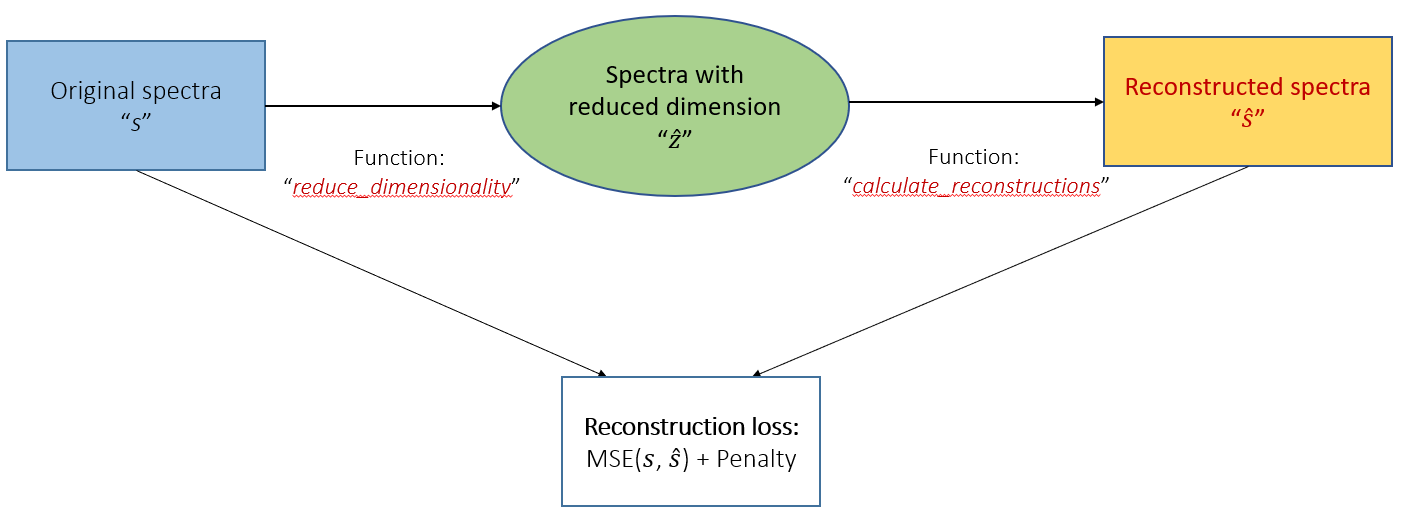

# An example

### Load functions


In [ ]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import h5py

### Import data

In [ ]:
data_train = h5py.File('/content/gdrive/MyDrive/GSOC_code/hackathon/data/train_set.hdf5', 'r')
x_train = np.array( data_train['spectra'] )
wavelengths = np.array( data_train["wavelengths"] )

data_val = h5py.File('/content/gdrive/MyDrive/GSOC_code/hackathon/data/val_set.hdf5', 'r')
x_val = np.array( data_val['spectra'] )

data_test = h5py.File('/content/gdrive/MyDrive/GSOC_code/hackathon/data/test_set.hdf5', 'r')
x_test = np.array( data_test['spectra'] )



### Example: Autoencoder


In [ ]:
# Load packages

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [ ]:
# Process the dataset

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, x_val))


train_dataset = train_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Light intensity is non-negative, hence we enforce this restriction on the reconstructed spectra, too, by . 
# This helps to improve model performance.
def custom_tanh(x, target_min=0, target_max=None):
    '''
    For given max and min values, return tanh activation with values in this range

    Inputs:
    - x: values to be transformed (np.array)
    - target_min: minimum value of tanh function (float)
    - target_max: max value of tanh function (float)

    Returns:
    - x transformed by tanh activation (np.array)
    '''

    x_02range = BK.tanh(x) + 1  # x mapped into range(0,2)
    scale = (target_max - target_min) / 2.  # calculate target range of transformed x

    return (x_02range * scale + target_min)

# Specify custom decoder layer
max_val = x_train.max().max()
# create custom tanh activation by specifying max value allowed for reconstructions
custom_tanh_activation = lambda x: custom_tanh(x, target_max=max_val)

In [ ]:



# Define encoder and decoder functions and objects

def get_encoder(encoded_dim, input_shape = x_train.shape[1]):
  encoder = Sequential([
      Dense(264, input_shape = (input_shape,) ),
      Dense(128, activation = 'relu' ),
      Dense(encoded_dim),
  ])
  print(encoder.summary())

  return(encoder)

def get_decoder(encoded_dim, output_shape = x_train.shape[1]):

  decoder = Sequential([
      Dense(128, input_shape = (encoded_dim,), activation = 'relu'),
      Dense(264, activation = 'relu' ),
      Dense(output_shape, activation = 'relu'), # mapping_to_target_range
  ])
  print(decoder.summary())

  return(decoder)


In [ ]:
# Specify the model and compile

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

encoded_dim = 5

epochs = 10

encoder = get_encoder(encoded_dim, x_train.shape[1])
decoder = get_decoder(encoded_dim, x_train.shape[1])

# Initialise and compile VAE
ae = Model(inputs=encoder.inputs, outputs=decoder(encoder.outputs))
optimizer = tf.keras.optimizers.Adam()
optimizer.learning_rate  = 1e-3
ae.compile(optimizer=optimizer, loss = 'mean_squared_error')

ae_history = ae.fit(train_dataset, validation_data=val_dataset, epochs=epochs,
                    callbacks = [earlystopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 264)               10553400  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               33920     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 10,587,965
Trainable params: 10,587,965
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_4 (Dense)              (None, 264)               34056     
_________________

# Define function needed for the submission

In this case dimensionality reduction is performed by an encoder function, while calculating recnstructions is done by the decoder function.

In [ ]:
reduce_dimensionality = encoder
calculate_reconstructions = decoder

# Model evaluation: test set

Once you have identified you preferred model using train and validation sets, please run it on the test set. You will need to include the reconstruction loss for this set in your submission.

In [ ]:
test_set_latent_encoding = reduce_dimensionality(x_test)

In [ ]:
test_set_reconstructions = calculate_reconstructions(test_set_latent_encoding)

In [ ]:
# mean_squared_error(x_test, test_set_reconstructions, squared=True)
reconstr_loss(x_test, test_set_reconstructions, latent_dim = test_set_latent_encoding.shape[1])

0.1945709478501063

# Submission

Submission format:

Please email us:
 
1.   The link to your Google Colab Jupyter Notebook (or your Jupyter Notebook). The notebook should containt
  *   The final model.
  *   The two functions described above (one for dimensionality reduction and one for calculating reconstructions). The final model weights/parameters should be saved in a file and the two functions should use weights loaded from this file. (This is to make sure that we evaluate the model using the same weights as you)
  *   The loss calculation for the test set.
2. The file storing the model architecture/weights. This can be in any format (as long as it loads correctly in your notebook).
3. The loss you obtained on your test set.

Feel free to choose the ML framework of your choice for this problem.
